!["AIML"](https://i.ytimg.com/vi/LoTuTu_Z4Pk/maxresdefault.jpg)

### Machine Learning Types
1. Supervised Learning
2. Unsupervised Learning
3. Reinforcement Learning

### 1. Supervised Learning

- Labeled data

#### 1.1 Linear Regression
  - Ex: Predict the house prices

#### 1.2 Logistic Regression
  - Ex: Spam email detection (Yes or No)

#### 1.3 Decision Trees & Random forest
  - Ex: Like Flowcharts

#### 1.4 SVM (Suppport Vecctor MAchines)
  - Ex: wide margin between 2 groups



###2. Unsupervised Learning
. unlabelled data

. cannot predict output

###2.1 Clustering

   Ex: grouping of similar objects

###2.2 Association

   Ex: create relation between items


### 1.1 Linear Regression

- y_pred = mx + b is our prediction algo for our model.
- ERROR --> y_pred - y , where y is actual value at x.
- Find the cost function
- find the gradients using pratial derivatives of cost function w.r.t m and b resp.
- Now Use the Gradient Descent Algorithm (formula) to find the new values of m and b.
- now use these new values of m and b to find the predicted values and then its cost function.
- keep on repeating the process. Stop after soome iterations or certain error value

In [1]:
## Linear regression from Scratch, without using any third party libraries

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# let's take the data of house prices as Y (output) and one parameter affecting it, which is AREA,  as X (input).
x_data = np.array([1000, 1500, 1800, 2000, 2200, 2500, 3000])
y_data = np.array([200000, 300000, 330000, 380000, 400000, 460000, 540000])

In [5]:
## Normalize the data so that the gradient descent converge faster
x_mean = np.mean(x_data)
x_mean

np.float64(2000.0)

In [6]:
x_std = np.std(x_data)
x_std

np.float64(607.1008388821651)

In [7]:
x_norm = (x_data - x_mean) / x_std
x_norm

array([-1.64717282, -0.82358641, -0.32943456,  0.        ,  0.32943456,
        0.82358641,  1.64717282])

In [8]:
y_mean = np.mean(y_data)
y_mean

np.float64(372857.14285714284)

In [9]:
y_std = np.std(y_data)
y_std

np.float64(102359.90924384489)

In [10]:
y_norm = (y_data - y_mean) / y_std
y_norm

array([-1.68871919, -0.7117742 , -0.41869071,  0.06978178,  0.26517078,
        0.85133777,  1.63289376])

In [11]:
## Cost Function
def calc_cost(x, y, m, b):
  n = len(x)
  y_pred = m * x + b
  errors_sqaured = (y_pred - y)**2
  cost = (1/(2*n)) * np.sum(errors_sqaured)
  return cost

In [34]:
def gradient_descent(x, y, m_init, b_init, lr, iteration_count):
  n = len(x)
  m = m_init
  b = b_init


  for i in range(iteration_count):
    y_pred = m * x + b
    errors = (y_pred - y)
    d_m = (1/n) * np.sum(errors * x)
    d_b = (1/n) * np.sum(errors)

    # formula of greadient descent
    m = m - lr*(d_m)
    b = b - lr*(d_b)

    cost = calc_cost(x, y, m, b)

    with open("gd.txt", mode="a") as f:
      f.write(f"m -> {m} , b -> {b}, cost -> {cost}\n")
  print(f"m -> {m} , b -> {b}, cost -> {cost}\n")

In [42]:

m_init = 0
b_init = 0
lr = 0.1
iter_count = 100000

gradient_descent(x_norm, y_norm, m_init, b_init, lr, iter_count)

m -> 0.9977022792626057 , b -> 1.399674027473857e-16, cost -> 0.0022950809771005304



In [22]:
plt.figure(figsize=(10, 8))

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

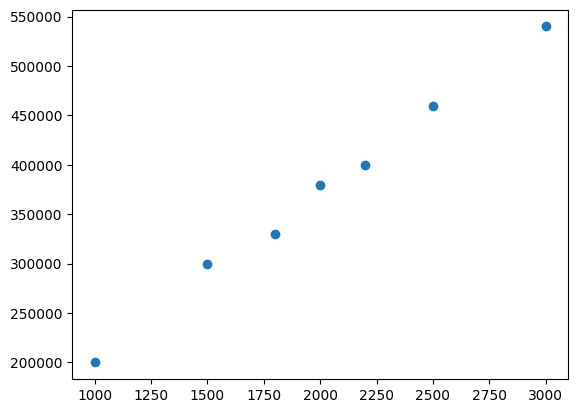

In [23]:
plt.scatter(x_data, y_data)

In [49]:
my_m = 0.9977022792626057
my_b = 1.399674027473857e-16

# convert from normalized scale to actual scale
m_actual = my_m * (y_std / x_std)
b_actual = y_mean - m_actual * x_mean

print(f"m_actual -> {m_actual}, b_actual -> {b_actual}")

m_actual -> 168.2170542635658, b_actual -> 36423.03433001123


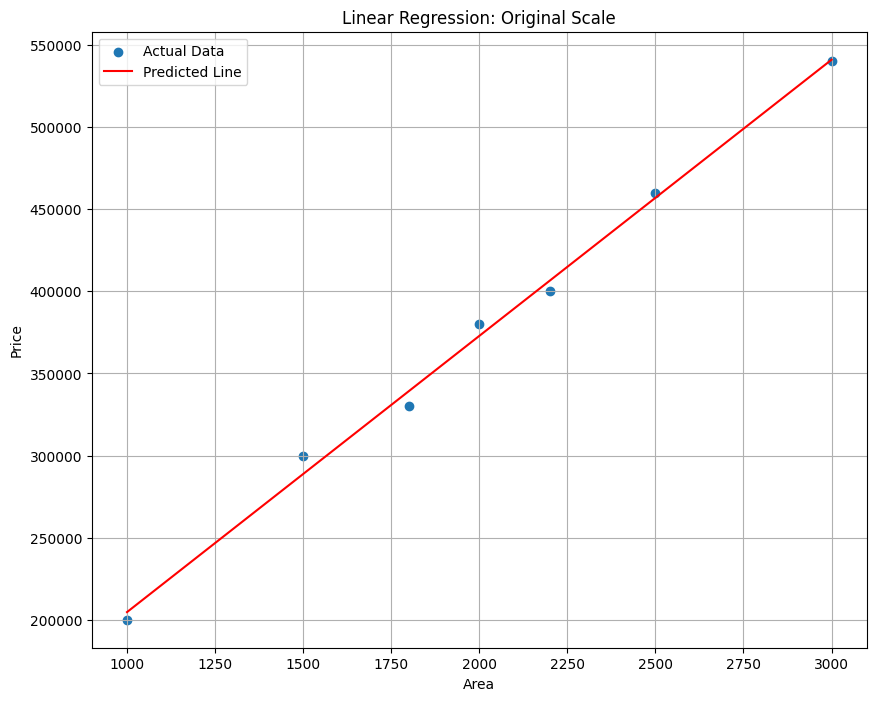

In [44]:
# Plot using original scale
plt.figure(figsize=(10, 8))
plt.scatter(x_data, y_data, label="Actual Data")
plt.plot(x_data, m_actual * x_data + b_actual, color='red', label="Predicted Line")
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Linear Regression: Original Scale")
plt.legend()
plt.grid(True)
plt.show()

## Now, doing the same with libraries

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Sample house price data
x_data = np.array([1000, 1500, 1800, 2000, 2200, 2500, 3000]).reshape(-1, 1)  # shape (n_samples, 1)
y_data = np.array([200000, 300000, 330000, 380000, 400000, 460000, 540000])
x_data , y_data


(array([[1000],
        [1500],
        [1800],
        [2000],
        [2200],
        [2500],
        [3000]]),
 array([200000, 300000, 330000, 380000, 400000, 460000, 540000]))

In [48]:
# Create and train the model
model = LinearRegression()
model.fit(x_data, y_data)

# Get the parameters
m = model.coef_[0]     # slope
b = model.intercept_   # intercept

print(f"Model: y = {m:.2f} * x + {b:.2f}")


Model: y = 168.22 * x + 36423.03


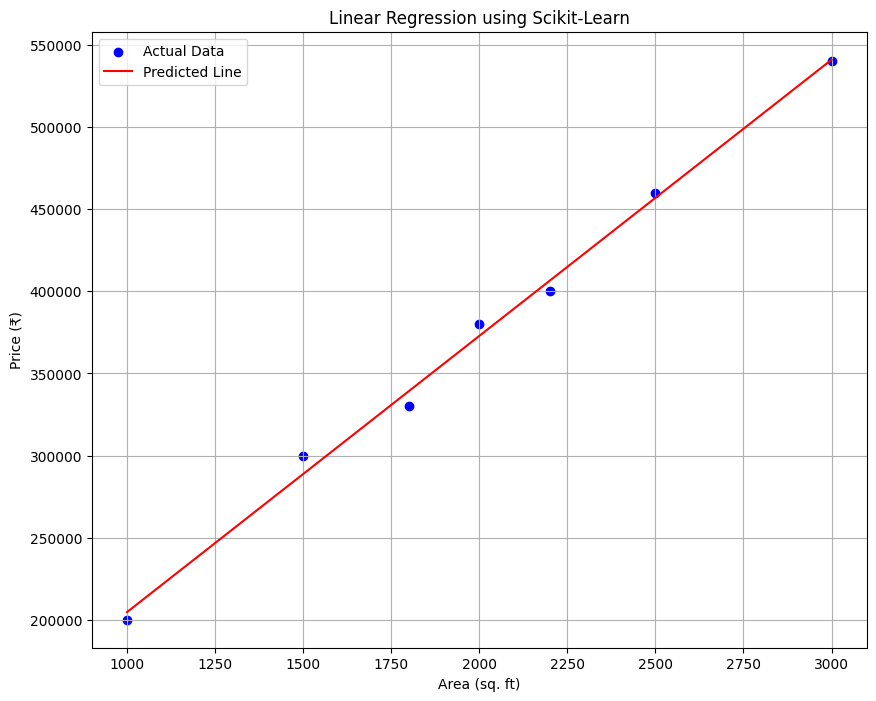

In [50]:
# Predict the values
y_pred = model.predict(x_data)

# Plotting
plt.figure(figsize=(10, 8))
plt.scatter(x_data, y_data, color='blue', label='Actual Data')
plt.plot(x_data, y_pred, color='red', label='Predicted Line')
plt.xlabel('Area (sq. ft)')
plt.ylabel('Price (₹)')
plt.title('Linear Regression using Scikit-Learn')
plt.legend()
plt.grid(True)
plt.show()
